In [ ]:
# conda env monte-prob

# 몬테카를로 시뮬레이션으로 배우는 확률 통계 (확률 과정)

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (3,2)

## random walk 로 도박꾼의 파산 시뮬레이션

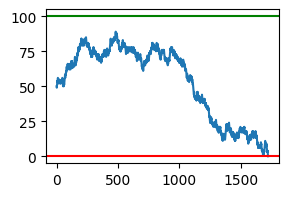

In [5]:
import random

def simulate(ruin, goal, money):
    
    random.seed(777)
    
    time = 0
    
    time_list = [time]
    money_list = [money]
    
    reward = 1
    while money in range(ruin+1, goal):
        time += 1

        game_res = random.choice([0,1])
        if game_res == 1:
            money += reward
        else:
            money -= reward
        
        time_list.append(time)
        money_list.append(money)

    plt.plot(time_list, money_list)
    plt.axhline(y=goal, color='green')
    plt.axhline(y=ruin, color='red')
    plt.show()
    
simulate(ruin = 0, goal = 100, money = 50)

## 포아송 과정

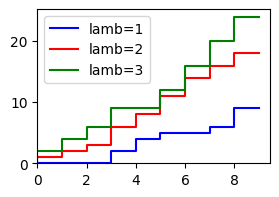

In [12]:
def poisson_process(lamb, n):
    x_list = np.random.poisson(lamb, size=n) # 각 시간 간격상에서 발생한 이벤트들 개수

    xt_list = [] # t 시점까지 발생한 이벤트의 개수     
    for t in range(0,n):
        xt = np.sum(x_list[0:t])
        xt_list.append(xt)
    return xt_list 

def draw_poison_process():
    
    np.random.seed(777)
    
    n = 10
    x_axis = list(range(0,n))

    xt_list1 = poisson_process(1,n)
    xt_list2 = poisson_process(2,n)
    xt_list3 = poisson_process(3,n)
    
    plt.step(x_axis, xt_list1, color='b', label='lamb=1')
    plt.step(x_axis, xt_list2, color='r', label='lamb=2')
    plt.step(x_axis, xt_list3, color='g', label='lamb=3')
    plt.legend()
    plt.xlim(0)
    plt.ylim(0)
    plt.show()

draw_poison_process()

## 브라운 운동

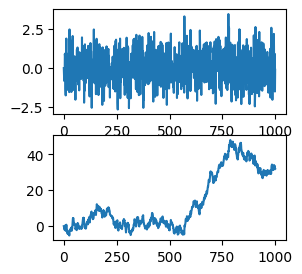

mean_Bt=0.031884319683461226, var_Bt=1.0070067410804027


In [29]:
import numpy as np

np.random.seed(777)
n = 1000
Bt = np.random.normal(loc=0, scale=1, size=n-1) # Brownian' motion of increments
Bt = np.insert(Bt, obj=0, values=0)
Bt_cumulative_sum = Bt.cumsum() # 절대 위치

plt.figure(figsize=(3,3))

plt.subplot(2,1,1)
plt.plot(Bt) # Brownian Motion Increments

plt.subplot(2,1,2)
plt.plot(Bt_cumulative_sum) # Brownian Motion Path
plt.show()

mean_Bt = np.mean(Bt)
var_Bt = np.var(Bt)
print(f"mean_Bt={mean_Bt}, var_Bt={var_Bt}")

## monte carlo 적분

In [33]:
def seq(start, stop, step):
    res = []
    current = start
    while current < stop:
        res.append(current)
        current += step
    return res

def factorial(x):
    x_list = list(range(1,x+1))
    res = 1
    for val in x_list:
        res *= val
    return res

def combination(n, x):
    res = factorial(n) / (factorial(x)*factorial(n-x))
    return res


def gamma_function(alpha, x):
    e = 2.7182818284
    res = (x**(alpha-1)*(e**(-x)))
    return res

def gamma(alpha):
    a = 0
    b = 100
    x_list = seq(a+0.0001, b, 0.001)
    
    gamma_list = []
    for x in x_list:
        y = gamma_function(alpha, x)
        gamma_list.append(y)
    res = ((b-a)/len(x_list)*sum(gamma_list))
    return res

assert np.isclose(gamma(3), 
                  factorial(3-1), 
                  rtol=1e-04, atol=1e-08, equal_nan=False)